In [6]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [7]:
df = pd.read_csv('insulin_dosage_prediction.csv') .drop("patient_id", axis=1)
df

,gender,age,family_history,glucose_level,physical_activity,food_intake,previous_medications,BMI,HbA1c,weight,insulin_sensitivity,sleep_hours,creatinine,Insulin
0,male,68,yes,103.49,9.28,high,none,33.87,7.42,54.77,1.49,6.07,0.63,steady
1,female,57,yes,113.35,6.67,high,insulin,19.10,11.66,114.93,1.35,8.60,1.08,up
2,male,24,yes,127.40,4.14,medium,oral,22.48,5.72,59.07,0.96,5.19,1.36,up
3,male,49,yes,138.79,6.80,medium,oral,31.67,11.91,50.81,0.61,4.79,1.23,up
4,male,65,no,128.42,4.01,low,insulin,28.50,5.72,65.95,1.16,7.68,0.62,steady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,female,33,no,193.35,6.40,high,none,29.20,4.74,61.66,1.33,6.18,0.58,no
9996,male,77,yes,140.01,2.28,low,none,34.41,4.93,66.62,0.84,6.74,0.74,up
9997,female,71,yes,190.90,8.53,medium,oral,26.82,9.64,76.26,1.47,9.71,0.67,steady
9998,female,33,yes,164.27,7.50,high,none,29.82,9.34,94.50,1.04,8.49,0.96,no


In [33]:
print(f"Number of missing values:\n{df.isna().sum()}\nNumber of duplicated rows: {df.duplicated().sum()}")

Number of missing values:
gender                  0
age                     0
family_history          0
glucose_level           0
physical_activity       0
food_intake             0
previous_medications    0
BMI                     0
HbA1c                   0
weight                  0
insulin_sensitivity     0
sleep_hours             0
creatinine              0
Insulin                 0
dtype: int64
Number of duplicated rows: 0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                10000 non-null  object 
 1   age                   10000 non-null  int64  
 2   family_history        10000 non-null  object 
 3   glucose_level         10000 non-null  float64
 4   physical_activity     10000 non-null  float64
 5   food_intake           10000 non-null  object 
 6   previous_medications  10000 non-null  object 
 7   BMI                   10000 non-null  float64
 8   HbA1c                 10000 non-null  float64
 9   weight                10000 non-null  float64
 10  insulin_sensitivity   10000 non-null  float64
 11  sleep_hours           10000 non-null  float64
 12  creatinine            10000 non-null  float64
 13  Insulin               10000 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 1.1+ MB


In [35]:
# for col in df.columns: 
#     print(col)
#     print(np.sort(df[col].unique()))

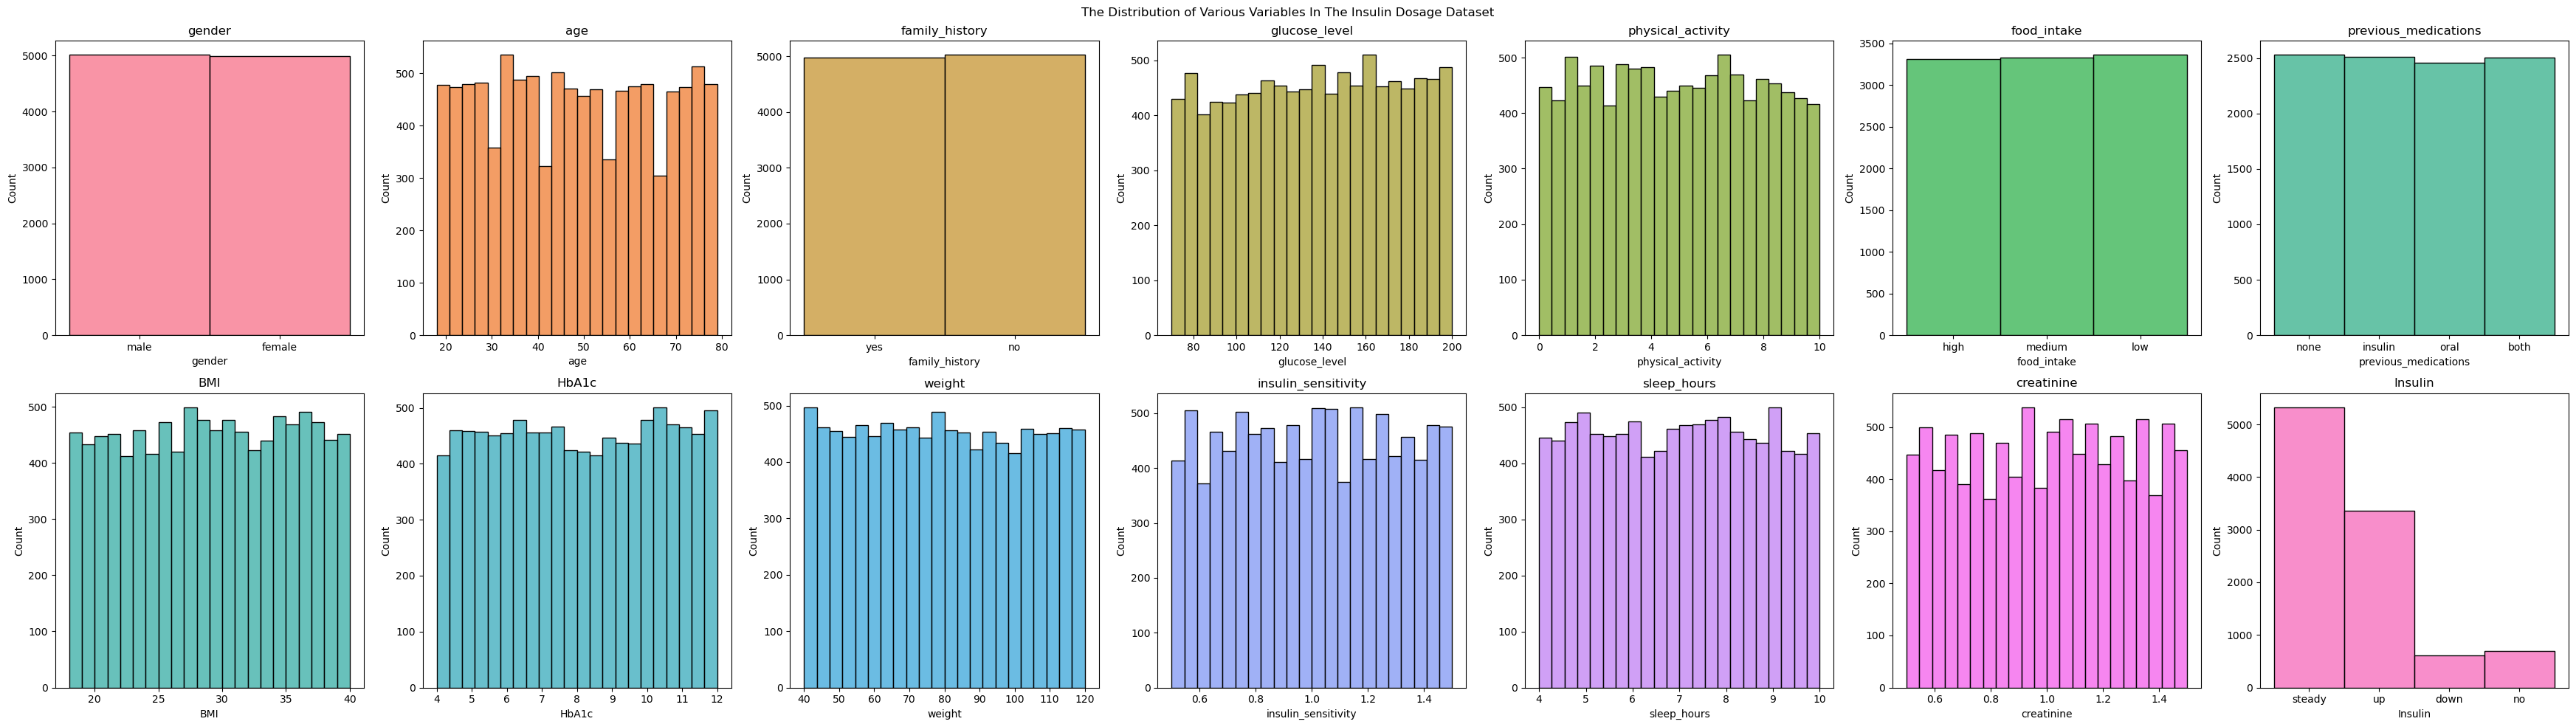

In [36]:
fig, ax = plt.subplots(2, 7, figsize=(35,10))

colours = sns.color_palette("husl", 14)

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//7, i%7], color=colours[i])
    ax[i//7, i%7].set_title(col)

plt.suptitle("The Distribution of Various Variables In The Insulin Dosage Dataset")
plt.tight_layout()
plt.show()

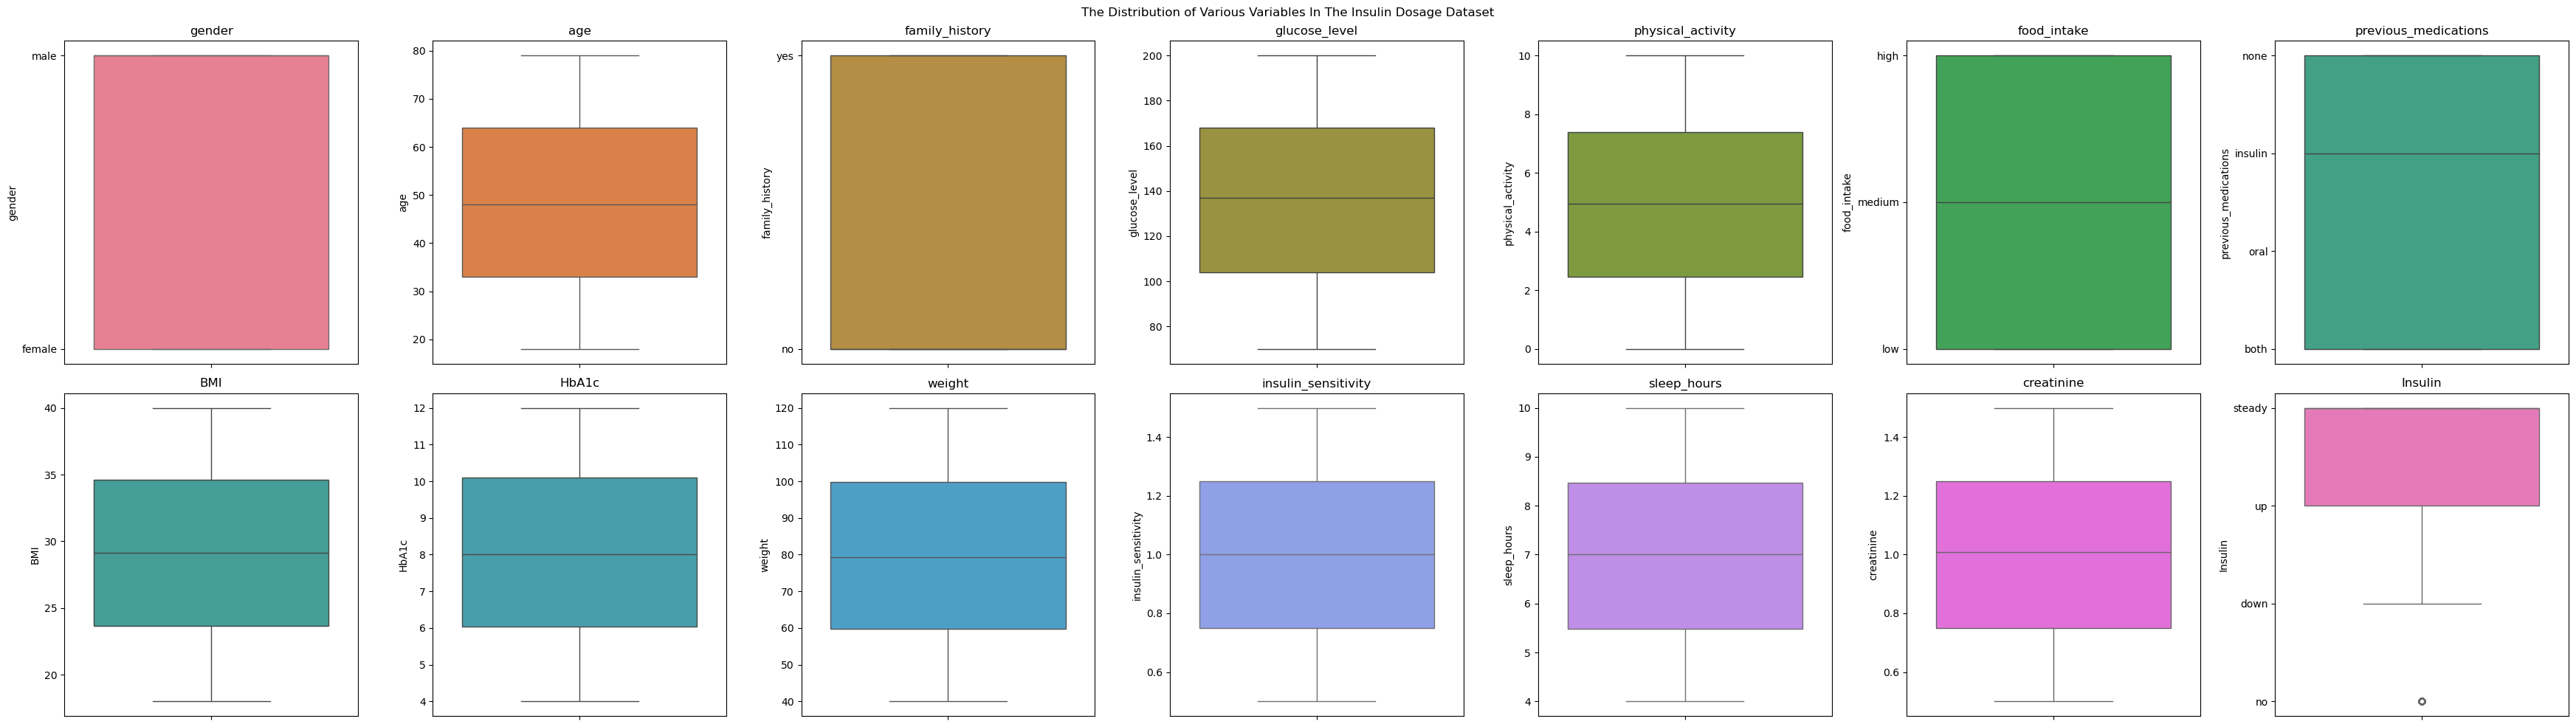

In [74]:
fig, ax = plt.subplots(2, 7, figsize=(35,10))

colours = sns.color_palette("husl", 14)

for i, col in enumerate(df.columns):
    sns.boxplot(df[col], ax=ax[i//7, i%7], color=colours[i])
    ax[i//7, i%7].set_title(col)

plt.suptitle("The Distribution of Various Variables In The Insulin Dosage Dataset")
plt.tight_layout()
plt.show()

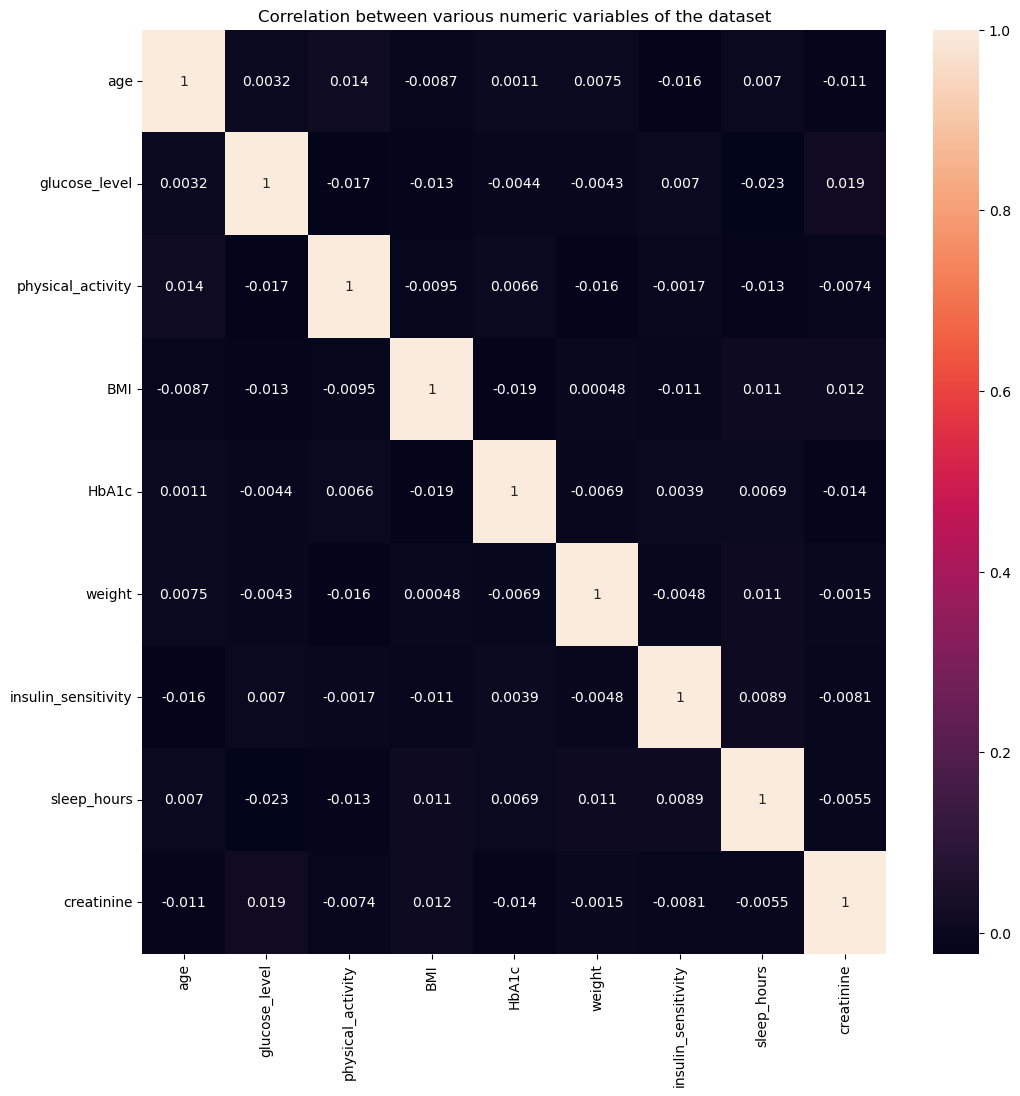

In [37]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.select_dtypes('number').corr(), annot=True)
plt.title("Correlation between various numeric variables of the dataset")
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [11]:
model = RandomForestClassifier(n_estimators=200)

num_cols = ['age', 'glucose_level', 'physical_activity', 'BMI', 'HbA1c', 'weight', 'insulin_sensitivity', 'sleep_hours', 'creatinine']
nominal_cols = ['gender', 'previous_medications']
ordinal_cols = ['family_history', 'food_intake']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('nom', OneHotEncoder(sparse_output=False), nominal_cols),
        ('ord', OrdinalEncoder(), ordinal_cols)
    ]
)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [1, 2, 3, 5, 7, 10]
}

In [12]:
x = df.drop('Insulin', axis=1)
y = df['Insulin']

x_transformed = preprocessor.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.3, random_state=12)

In [ ]:
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
# grid_search.fit(x_train, y_train)

# just so i don't keep accidentally re-running this tedious bit again and again

In [42]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

best_rf = grid_search.best_estimator_
test_acc = best_rf.score(x_test, y_test)
y_pred = best_rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.978

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        down       0.98      0.87      0.92       190
          no       0.98      0.99      0.99       189
      steady       0.97      1.00      0.98      1604
          up       0.99      0.96      0.98      1017

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



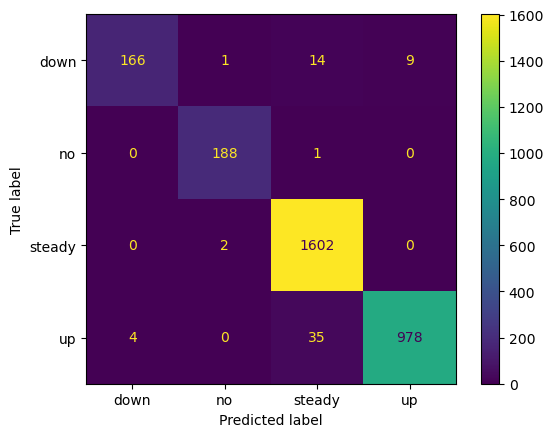

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

In [2]:
best_rf = model

In [40]:
from sklearn.utils.validation import check_is_fitted

print(check_is_fitted(best_rf))

None


In [49]:
label_binarizer.classes_

array(['down', 'no', 'steady', 'up'], dtype='<U6')

In [45]:
import joblib

joblib.dump(best_rf, 'insulin_dosage_predictor_v2.joblib')

['insulin_dosage_predictor_v2.joblib']

In [ ]:
## all the stuff below this was for debugging and serves no purpose other than showing my work

In [1]:
import joblib

model = joblib.load("insulin_dosage_predictor_v2.joblib")

In [47]:
transformed_columns = preprocessor.get_feature_names_out()
transformed_columns

array(['num__age', 'num__glucose_level', 'num__physical_activity',
       'num__BMI', 'num__HbA1c', 'num__weight',
       'num__insulin_sensitivity', 'num__sleep_hours', 'num__creatinine',
       'nom__gender_female', 'nom__gender_male',
       'nom__previous_medications_both',
       'nom__previous_medications_insulin',
       'nom__previous_medications_none', 'nom__previous_medications_oral',
       'ord__family_history', 'ord__food_intake'], dtype=object)

In [48]:
df.columns

Index(['gender', 'age', 'family_history', 'glucose_level', 'physical_activity',
       'food_intake', 'previous_medications', 'BMI', 'HbA1c', 'weight',
       'insulin_sensitivity', 'sleep_hours', 'creatinine', 'Insulin'],
      dtype='object')

In [49]:
gender = 'male'
age = 35
family_history = 'no'
glucose_level = 140.00
physical_activity = 2.00
food_intake = 'low'
previous_medications = 'none'
BMI = 30.00
HbA1c = 8.00
weight = 80.00
insulin_sensitivity = 1.50
sleep_hours = 8.00
creatinine = 1.30

inputs = [[gender, age, family_history, glucose_level, physical_activity, food_intake, previous_medications, BMI, HbA1c, weight, insulin_sensitivity, sleep_hours, creatinine]]

In [50]:
input_df = pd.DataFrame(inputs, columns=df.columns[:-1])
# input_df = pd.DataFrame(inputs, columns=transformed_columns)
input_df

,gender,age,family_history,glucose_level,physical_activity,food_intake,previous_medications,BMI,HbA1c,weight,insulin_sensitivity,sleep_hours,creatinine
0,male,35,no,140.0,2.0,low,none,30.0,8.0,80.0,1.5,8.0,1.3


In [51]:
transformed_data = preprocessor.transform(input_df)
transformed_data

array([[-0.74454064,  0.10325266, -1.03306914,  0.14213074, -0.01675114,
         0.01360689,  1.73228436,  0.58525623,  1.03409572,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ]])

In [53]:
prediction = model.predict(transformed_data)[0]
prediction

'steady'